In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install networkx
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.9 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc
import pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=934c97de699a2fa75ec33e8e861f7daad99e7a620d39402b35a73acb58682d2f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler


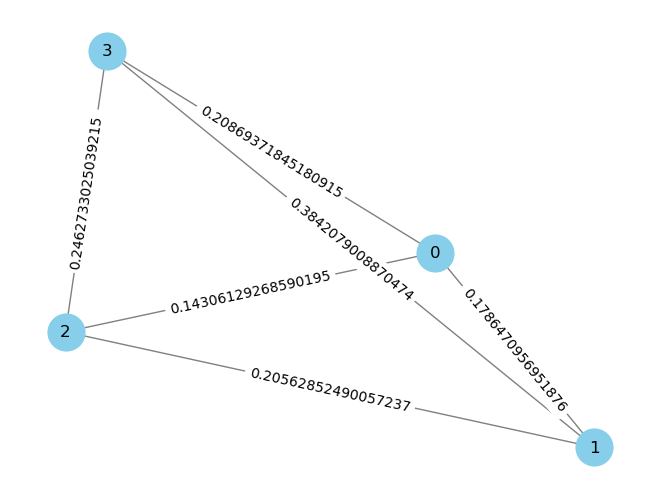

In [ ]:
def generate_synthetic_tsp_data(num_cities):
    np.random.seed(0)
    cities = np.random.rand(num_cities, 2)  # Generate random coordinates for cities
    graph = nx.complete_graph(num_cities)  # Create a complete graph

    for i, (x, y) in enumerate(cities):
        graph.nodes[i]['pos'] = (x, y)

    for (i, j) in graph.edges():
        distance = np.linalg.norm(cities[i] - cities[j])
        graph.edges[i, j]['weight'] = distance

    return graph, cities

num_cities = 4
graph, cities = generate_synthetic_tsp_data(num_cities)

# Plot the graph
pos = nx.get_node_attributes(graph, 'pos')
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.show()


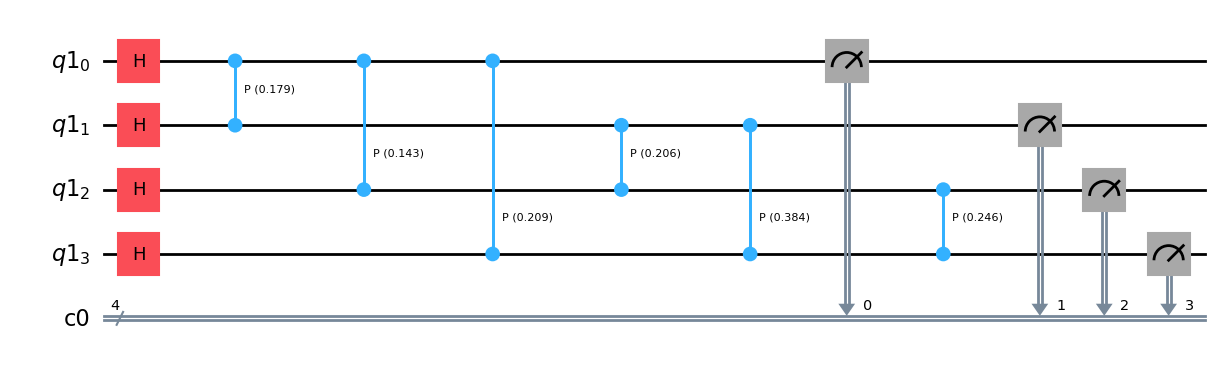

In [ ]:
def create_quantum_walk_circuit(graph):
    num_qubits = graph.number_of_nodes()
    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(num_qubits)
    qc = QuantumCircuit(qr, cr)

    # Apply Hadamard gates to create superposition
    for i in range(num_qubits):
        qc.h(qr[i])

    # Apply controlled-phase shift based on the distance between nodes (edges)
    for i, j in graph.edges():
        weight = graph[i][j]['weight']
        qc.cp(weight, qr[i], qr[j])

    # Measurement
    qc.measure(qr, cr)

    return qc

qc = create_quantum_walk_circuit(graph)
qc.draw('mpl')


In [ ]:
from qiskit import transpile
class Sampler:
    def __init__(self):
        # Initialize the quantum simulator backend
        self.backend = Aer.get_backend('qasm_simulator')
    def run(self, qc: QuantumCircuit):
        # Transpile the circuit for the simulator
        transpiled_qc = transpile(qc, self.backend)
        # Execute the circuit
        job = self.backend.run(transpiled_qc)
        return job
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)
plt.show()
